In [20]:
import sys
sys.path.append('./python_code')

In [21]:
import cv2
# Python 2.7
# from scipy.misc import imread, imsave
# Para Python > 3.5 o para Python < 3.5 -> pip install imageio
from imageio import imread, imsave
from matplotlib import pyplot as plt
import select_pixels as sel
import image_manager as imm
import numpy as np

In [34]:
#Captura de imagenes 
capture = cv2.VideoCapture('videos/video_normalizado.avi')
key = 0
# We do quit if the keyword "q" = 113 is intered.
while (key != 113):
    # Leo una imagen del video
    ret,im = capture.read()
  
    if not ret:
        print('Se acabo el video.')
        cv2.destroyAllWindows()
        break
        
    # Muestro la imagen en una ventala OpenCV
    cv2.imshow("Captura", im)

    key = cv2.waitKey(35)
    
# Cierro la ventana 
cv2.destroyAllWindows() 
capture.release()

Se acabo el video.


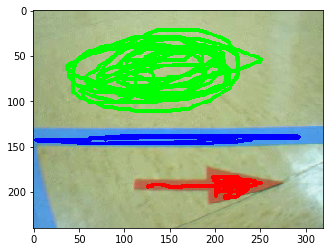

In [4]:
# Transformo la imagen al formato Python
imNumpy=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

# Llamo a la funcion para etiquetar la imagen
markImg = sel.select_fg_bg(imNumpy)

plt.imshow(markImg)
plt.show()

In [11]:
# Guardo las imagenes
imsave('images/original.png',imNumpy)
imsave('images/edited.png',markImg)

NameError: name 'imNumpy' is not defined

In [22]:
img_orginal = cv2.imread('images/original.png')
img_edited = cv2.imread('images/edited.png')

In [23]:
red = [0,0,255]
green = [0,255,0]
blue = [255,0,0]

In [24]:
# guardar las tres imagenes resultantes
arrow = imm.getImage(img_edited,red)
ground = imm.getImage(img_edited,green)
line = imm.getImage(img_edited,blue)
imsave('images/arrow.png',arrow)
imsave('images/ground.png',ground)
imsave('images/line.png',line)

In [33]:
#Captura de imagenes
capture = cv2.VideoCapture('videos/video2017-4.avi')
key = 0

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('videos/video_normalizado.avi', fourcc, 25.0, (320, 240))

# We do quit if the keyword "q" = 113 is intered.
while (key != 113):
    # Leo una imagen del video
    ret,im = capture.read()
  
    if not ret:
        print('Se acabo el video.')
        cv2.destroyAllWindows()
        break
        
    # Muestro la imagen en una ventala OpenCV normalizandola con la funcion normalizeImage
    img_norm = imm.normalizeImage(im)
    
    # Guardar la imagen normalizada en el video
    out.write(np.uint8(img_norm*255))
    
    # Mostrar la imagen normalizada en una ventana
    cv2.imshow("Captura", im)

    key = cv2.waitKey(35)
    
# Cierro la ventana 
cv2.destroyAllWindows() 
capture.release()
out.release()